In [7]:
import numpy as np
from time import time
import scipy as sc
import matplotlib.pyplot as plt
import sys
import seaborn as sns
%matplotlib inline

In [2]:
sys.path.append('./lib/source/')

from errors import *
from data import *
from methods import *

In [3]:
all_methods = ['SVT', 
               'SoftImpute',
               'SVP',
               'RISMF']

sample_fraction = 0.1
rank = 5
dims = (200, 200)
max_iter = int(1e3)
tol = 1e-4
nsamp = int(sample_fraction * np.prod(dims))

M = get_data('synthetic', rank, dims, noise='y')
omega = sampling_operator(nsamp, dims)
data = get_sampling_vector(M, omega)

t0 = time()
X_svt = get_completion(omega, data, rank, dims, 'SVT', max_iter, tol)
t1 = time()
print 'RMSE error: %f. Time: %d min %d sec.' % (RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

t0 = time()
X_svp = get_completion(omega, data, rank, dims, 'SVP', max_iter, tol)
t1 = time()
print 'RMSE error: %f. Time: %d min %d sec.' % (RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

t0 = time()
X_si = get_completion(omega, data, rank, dims, 'SoftImpute', int(max_iter), tol)
t1 = time()
print 'RMSE error: %f. Time: %d min %d sec.' % (RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

KeyboardInterrupt: 

# Experiments with synthetic data

## 1 Fixed matrix size, fixed rank, different number of samples

In [4]:
sample_fraction_array = np.linspace(0.1, 0.9, 9)
rank = 5
dims = (200, 200)
max_iter = int(1e3)
tol = 1e-4

M = get_data('synthetic', rank, dims, noise='y')

### Soft-Impute

In [17]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 0.263484. Time: 0 min 1 sec.
Sample fraction: 0.20. RMSE error: 0.096907. Time: 0 min 0 sec.
Sample fraction: 0.30. RMSE error: 0.069346. Time: 0 min 0 sec.
Sample fraction: 0.40. RMSE error: 0.055884. Time: 0 min 0 sec.
Sample fraction: 0.50. RMSE error: 0.046805. Time: 0 min 0 sec.
Sample fraction: 0.60. RMSE error: 0.040072. Time: 0 min 0 sec.
Sample fraction: 0.70. RMSE error: 0.033282. Time: 0 min 0 sec.
Sample fraction: 0.80. RMSE error: 0.026621. Time: 0 min 0 sec.
Sample fraction: 0.90. RMSE error: 0.018774. Time: 0 min 0 sec.


### SVP

In [26]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 0.001666. Time: 0 min 12 sec.
Sample fraction: 0.20. RMSE error: 0.001107. Time: 0 min 22 sec.
Sample fraction: 0.30. RMSE error: 0.001047. Time: 0 min 38 sec.
Sample fraction: 0.40. RMSE error: 0.001021. Time: 0 min 47 sec.
Sample fraction: 0.50. RMSE error: 0.001003. Time: 0 min 51 sec.
Divergence! Try to decrease tau. Current tau is 2.5
Sample fraction: 0.60. RMSE error: 2375.605147. Time: 0 min 2 sec.
Divergence! Try to decrease tau. Current tau is 2.5
Sample fraction: 0.70. RMSE error: 2949.490506. Time: 0 min 1 sec.
Divergence! Try to decrease tau. Current tau is 2.5
Sample fraction: 0.80. RMSE error: 3327.788891. Time: 0 min 1 sec.
Divergence! Try to decrease tau. Current tau is 2.5
Sample fraction: 0.90. RMSE error: 3109.269357. Time: 0 min 1 sec.


### SVT

In [27]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 1.716512. Time: 1 min 32 sec.
Sample fraction: 0.20. RMSE error: 0.032231. Time: 0 min 58 sec.
Sample fraction: 0.30. RMSE error: 0.001047. Time: 0 min 34 sec.
Sample fraction: 0.40. RMSE error: 0.001021. Time: 0 min 42 sec.
Sample fraction: 0.50. RMSE error: 0.001003. Time: 0 min 50 sec.
Sample fraction: 0.60. RMSE error: 0.000993. Time: 0 min 57 sec.
Sample fraction: 0.70. RMSE error: 0.000987. Time: 1 min 4 sec.
Sample fraction: 0.80. RMSE error: 0.000982. Time: 1 min 12 sec.
Sample fraction: 0.90. RMSE error: 0.000978. Time: 1 min 25 sec.


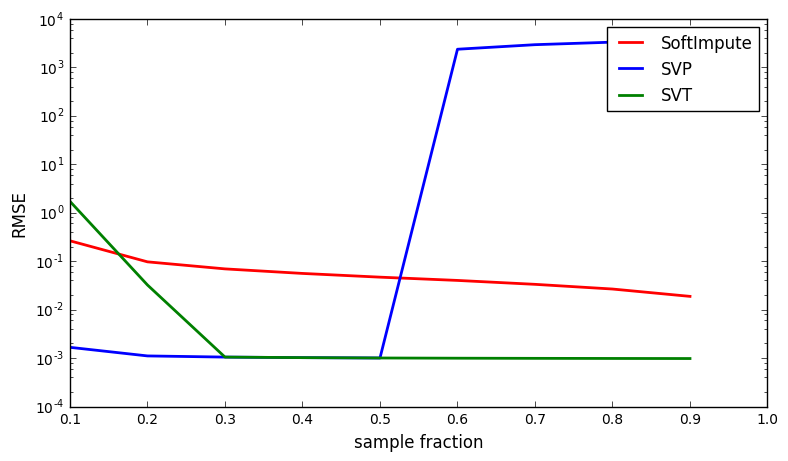

In [39]:
plt.figure(figsize=(9,5))
plt.semilogy(sample_fraction_array, RMSE_si_array, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp_array, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'])
plt.xlabel('sample fraction', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.savefig('./results/synthetic_nsamp_rmse.png')
plt.show()

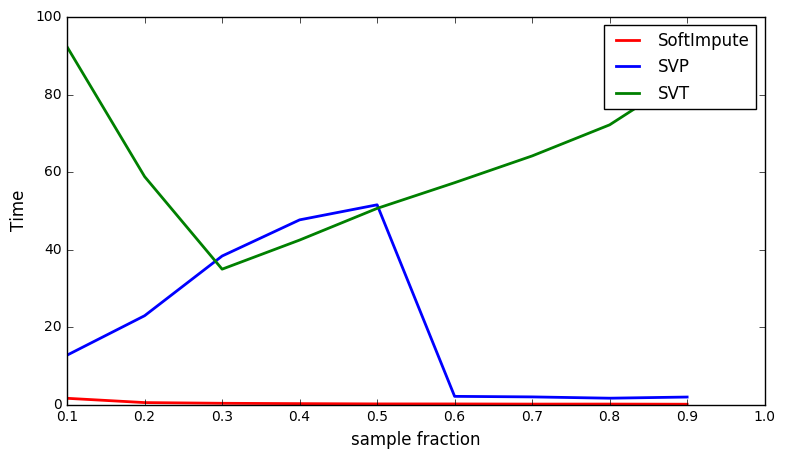

In [41]:
plt.figure(figsize=(9,5))
plt.plot(sample_fraction_array, time_si_array, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp_array, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'])
plt.xlabel('sample fraction', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.savefig('./results/synthetic_nsamp_time.png')
plt.show()

## 2 Fixed matrix size, fixed number of samples, different rank

In [42]:
sample_fraction = 0.2
rank_array = range(5, 56, 5)
dims = (200, 200)
max_iter = int(1e3)
tol = 1e-4

nsamp = int(sample_fraction * np.prod(dims))
omega = sampling_operator(nsamp, dims)

In [44]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5.00. RMSE error: 0.096907. Time: 0 min 0 sec.
Matrix rank: 10.00. RMSE error: 0.258506. Time: 0 min 1 sec.
Matrix rank: 15.00. RMSE error: 0.660308. Time: 0 min 2 sec.
Matrix rank: 20.00. RMSE error: 1.441384. Time: 0 min 8 sec.
Matrix rank: 25.00. RMSE error: 3.703882. Time: 0 min 10 sec.
Matrix rank: 30.00. RMSE error: 4.446448. Time: 0 min 11 sec.
Matrix rank: 35.00. RMSE error: 4.931729. Time: 0 min 12 sec.
Matrix rank: 40.00. RMSE error: 5.451870. Time: 0 min 12 sec.
Matrix rank: 45.00. RMSE error: 5.792142. Time: 0 min 13 sec.
Matrix rank: 50.00. RMSE error: 6.175845. Time: 0 min 14 sec.
Matrix rank: 55.00. RMSE error: 6.494835. Time: 0 min 16 sec.


In [45]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

KeyboardInterrupt: 

In [ ]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60

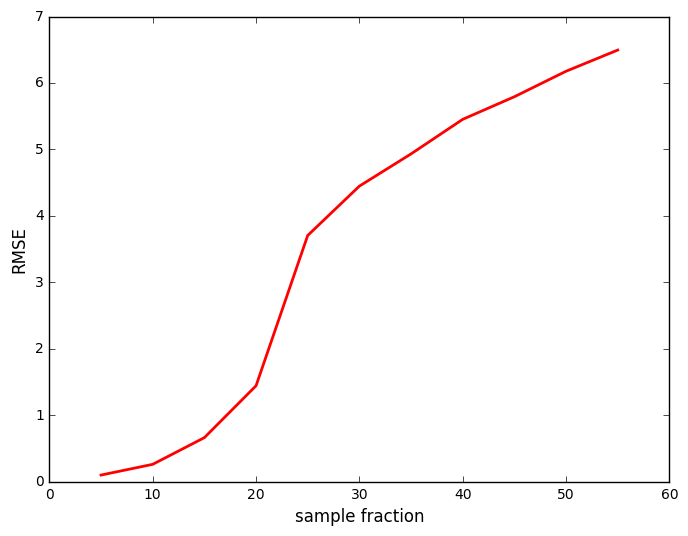

In [46]:
plt.figure(figsize=(8,6))
plt.plot(rank_array, RMSE_si_array, 'r', linewidth=2)
plt.plot(rank_array, RMSE_svp_array, 'b', linewidth=2)
plt.plot(rank_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'])
plt.xlabel('sample fraction', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.savefig('./results/synthetic_rank_rmse.png')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(rank_array, RMSE_si_array, 'r', linewidth=2)
plt.plot(rank_array, RMSE_svp_array, 'b', linewidth=2)
plt.plot(rank_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'])
plt.xlabel('sample fraction', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.savefig('./results/synthetic_rank_time.png')
plt.show()

# Real data experiment

In [12]:
sample_fraction_array = np.linspace(0.1, 0.9, 9)
rank = 5
max_iter = int(1e3)
tol = 1e-4

M = get_data('real', -1, -1, row_num=1000)
dims = M.shape

### Soft-Impute

In [13]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 5.959191. Time: 0 min 3 sec.
Sample fraction: 0.20. RMSE error: 4.287979. Time: 0 min 3 sec.
Sample fraction: 0.30. RMSE error: 3.479257. Time: 0 min 4 sec.
Sample fraction: 0.40. RMSE error: 3.044822. Time: 0 min 4 sec.
Sample fraction: 0.50. RMSE error: 2.699986. Time: 0 min 4 sec.
Sample fraction: 0.60. RMSE error: 2.387087. Time: 0 min 4 sec.
Sample fraction: 0.70. RMSE error: 2.042966. Time: 0 min 4 sec.
Sample fraction: 0.80. RMSE error: 1.647020. Time: 0 min 4 sec.
Sample fraction: 0.90. RMSE error: 1.157807. Time: 0 min 4 sec.


### SVP

In [14]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 8.846536. Time: 0 min 24 sec.
Sample fraction: 0.20. RMSE error: 5.874870. Time: 1 min 5 sec.
Sample fraction: 0.30. RMSE error: 4.089481. Time: 1 min 4 sec.


KeyboardInterrupt: 

### SVT

In [27]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 1.716512. Time: 1 min 32 sec.
Sample fraction: 0.20. RMSE error: 0.032231. Time: 0 min 58 sec.
Sample fraction: 0.30. RMSE error: 0.001047. Time: 0 min 34 sec.
Sample fraction: 0.40. RMSE error: 0.001021. Time: 0 min 42 sec.
Sample fraction: 0.50. RMSE error: 0.001003. Time: 0 min 50 sec.
Sample fraction: 0.60. RMSE error: 0.000993. Time: 0 min 57 sec.
Sample fraction: 0.70. RMSE error: 0.000987. Time: 1 min 4 sec.
Sample fraction: 0.80. RMSE error: 0.000982. Time: 1 min 12 sec.
Sample fraction: 0.90. RMSE error: 0.000978. Time: 1 min 25 sec.
